In [1]:
from pydeseq2.ds import DeseqStats
!pip install anndata

In [4]:
import anndata as ad
import pandas as pd

In [5]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")


In [7]:
!pip install pydeseq2


In [8]:
adata = ppmi_ad[(ppmi_ad.obs["Gender"] == "Male") &
                (ppmi_ad.obs["Visit"] == "BL") &
                (ppmi_ad.obs["Diagnosis"].isin(["PD", "Control"])) &
                (ppmi_ad.obs["Age_Group"] == "50-70")]

In [9]:
adata[adata.obs["Age_Group"] == "50-70"].obs["Diagnosis"].value_counts()


Diagnosis
PD         166
Control     80
Name: count, dtype: int64

In [10]:
from sklearn.feature_selection import VarianceThreshold
counts_log2 = pd.DataFrame(adata.layers['counts_log2'], index=adata.obs_names, columns=adata.var_names)
selector = VarianceThreshold(threshold=0.01)
filtered_counts = selector.fit_transform(counts_log2)
filtered_genes = counts_log2.columns[selector.get_support()]
filtered_genes

Index(['ENSG00000223972.5', 'ENSG00000227232.5', 'ENSG00000278267.1',
       'ENSG00000243485.5', 'ENSG00000237613.2', 'ENSG00000268020.3',
       'ENSG00000240361.2', 'ENSG00000186092.6', 'ENSG00000238009.6',
       'ENSG00000233750.3',
       ...
       'ENSG00000273739.1', 'ENSG00000276700.1', 'ENSG00000276312.1',
       'ENSG00000275757.1', 'ENSG00000278573.1', 'ENSG00000276017.1',
       'ENSG00000278817.1', 'ENSG00000277196.4', 'ENSG00000278625.1',
       'ENSG00000277374.1'],
      dtype='object', length=57261)

In [35]:
cell_props = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/cibersortx_metadata_df.csv", index_col=0)
filtered_cell_meta = cell_props.loc[adata.obs["Sample"],:]
filtered_cell_meta = filtered_cell_meta.loc[:, filtered_cell_meta.columns.isin(["Diagnosis", "Neutrophils", "Monocytes", "T cells CD4 naive", "NK cells activated", "NK cells resting", "T cells CD4 memory resting"])]
filtered_cell_meta = filtered_cell_meta.loc[:, filtered_cell_meta.sum(axis=0) != 0]
filtered_cell_meta.columns = (filtered_cell_meta.columns
                              .str.replace(" ", "_")
                              .str.replace("-", "_")
                              .str.replace(r"\(|\)", "", regex=True))
design_factors = filtered_cell_meta.columns.values.tolist()
design_factors

['T_cells_CD4_naive',
 'T_cells_CD4_memory_resting',
 'NK_cells_resting',
 'NK_cells_activated',
 'Monocytes',
 'Neutrophils',
 'Diagnosis']

In [11]:
adata.obs.head()

,Sample,Diagnosis,Visit,Gender,Patient,Genetic_Group,Age_Group
3435.BL.PP0015.8880.5104.SL.0011,3435.BL.PP0015.8880.5104.SL.0011,PD,BL,Male,3435,SRDC,50-70
3479.BL.PP0021.2283.5104.SL.0021,3479.BL.PP0021.2283.5104.SL.0021,Control,BL,Male,3479,None,50-70
3174.BL.PP0015.7985.5104.SL.0027,3174.BL.PP0015.7985.5104.SL.0027,PD,BL,Male,3174,SRDC,50-70
3415.BL.PP0016.0856.5104.SL.0039,3415.BL.PP0016.0856.5104.SL.0039,PD,BL,Male,3415,SRDC,50-70
3087.BL.0003160140.5104.SL.0046,3087.BL.0003160140.5104.SL.0046,Control,BL,Male,3087,None,50-70


In [18]:
metadata = adata.obs.copy()

In [13]:
df = adata.to_df()
df = df.loc[:, filtered_genes]
df.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.2,ENSG00000186092.6,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000273739.1,ENSG00000276700.1,ENSG00000276312.1,ENSG00000275757.1,ENSG00000278573.1,ENSG00000276017.1,ENSG00000278817.1,ENSG00000277196.4,ENSG00000278625.1,ENSG00000277374.1
3435.BL.PP0015.8880.5104.SL.0011,15,209,6,8,6,6,19,7,176,29,...,2,12,7,0,6,2,32,17,0,0
3479.BL.PP0021.2283.5104.SL.0021,3,107,3,0,0,0,0,0,35,0,...,1,0,6,0,0,0,28,0,0,0
3174.BL.PP0015.7985.5104.SL.0027,7,239,5,0,0,0,0,0,110,1,...,0,0,0,0,0,2,9,0,0,0
3415.BL.PP0016.0856.5104.SL.0039,6,161,6,4,1,1,7,0,109,6,...,1,5,3,0,0,3,13,5,0,0
3087.BL.0003160140.5104.SL.0046,5,139,6,5,0,0,0,0,80,0,...,0,9,11,1,0,0,19,3,0,0


In [50]:
ppmi_ad.to_df().to_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/counts.csv")
ppmi_ad.obs.to_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/metadata.csv")


In [36]:
from pydeseq2.ds import DeseqDataSet
# dds = DeseqDataSet(counts=df, metadata=metadata[['Diagnosis']], design="~Diagnosis")
dds = DeseqDataSet(counts=df, metadata=filtered_cell_meta, design_factors=design_factors)

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_47620/3715242941.py:3: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=df, metadata=filtered_cell_meta, design_factors=design_factors)


In [37]:
dds.deseq2()

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.67 seconds.

Fitting dispersions...
... done in 58.36 seconds.

Fitting dispersion trend curve...
... done in 1.82 seconds.

Fitting MAP dispersions...
... done in 64.53 seconds.

Fitting LFCs...
... done in 193.93 seconds.

Calculating cook's distance...
... done in 1.75 seconds.

Replacing 0 outlier genes.



In [38]:
contrast = ("Diagnosis", "PD", "Control")
deseq_stats = DeseqStats(dds, contrast=contrast)
deseq_stats.summary()
deg_results = deseq_stats.results_df
deg_results.head()

Running Wald tests...
... done in 6.22 seconds.



Log2 fold change & Wald test p-value: Diagnosis PD vs Control
                     baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000223972.5    7.864582       -0.356643  0.186336 -1.913979  0.055623   
ENSG00000227232.5  105.204727       -0.184736  0.084349 -2.190148  0.028514   
ENSG00000278267.1   13.164982       -0.180613  0.129696 -1.392585  0.163745   
ENSG00000243485.5    1.696794       -0.716315  0.478724 -1.496300  0.134576   
ENSG00000237613.2    1.349785       -1.032066  0.623383 -1.655589  0.097805   
...                       ...             ...       ...       ...       ...   
ENSG00000276017.1    1.136266        0.036301  0.881074  0.041201  0.967136   
ENSG00000278817.1    8.372740       -0.086644  0.122842 -0.705335  0.480602   
ENSG00000277196.4    2.276256       -0.529988  0.472972 -1.120547  0.262481   
ENSG00000278625.1    0.111752       -0.098932  1.045623 -0.094616  0.924620   
ENSG00000277374.1    0.012882       -0.083953  3.179836 -0.026402  0.

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000223972.5,7.864582,-0.356643,0.186336,-1.913979,0.055623,0.267199
ENSG00000227232.5,105.204727,-0.184736,0.084349,-2.190148,0.028514,0.235717
ENSG00000278267.1,13.164982,-0.180613,0.129696,-1.392585,0.163745,0.408052
ENSG00000243485.5,1.696794,-0.716315,0.478724,-1.496300,0.134576,0.370317
ENSG00000237613.2,1.349785,-1.032066,0.623383,-1.655589,0.097805,0.322530


In [49]:
deg_results['abs_log2FoldChange'] = deg_results['log2FoldChange'].abs()
deg_results['padj'] = deg_results['padj'].fillna(1)
deg_results.sort_values(by=["abs_log2FoldChange", "padj"], ascending=[False, True])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
ENSG00000235226.1,0.706459,-9.935837e+00,4.951459,-2.006648e+00,0.044787,0.253729,9.935837e+00
ENSG00000217272.1,0.731186,-9.732976e+00,4.151937,-2.344201e+00,0.019068,0.222244,9.732976e+00
ENSG00000270654.1,0.668464,-9.719333e+00,4.923692,-1.973993e+00,0.048383,0.257571,9.719333e+00
ENSG00000202034.1,0.601568,-9.710986e+00,5.490118,-1.768812e+00,0.076925,0.294213,9.710986e+00
ENSG00000284356.1,0.427614,9.665530e+00,6.656516,1.452040e+00,0.146490,0.385784,9.665530e+00
...,...,...,...,...,...,...,...
ENSG00000101150.17,3188.492065,9.552136e-06,0.033075,2.888025e-04,0.999770,0.999965,9.552136e-06
ENSG00000236232.1,0.645880,6.559272e-06,0.762917,8.597626e-06,0.999993,1.000000,6.559272e-06
ENSG00000160688.18,634.555129,6.298037e-06,0.023670,2.660776e-04,0.999788,0.999965,6.298037e-06
ENSG00000113303.11,733.840685,5.513657e-06,0.051323,1.074300e-04,0.999914,0.999984,5.513657e-06


In [47]:
deg_results = deg_results.drop(index=deg_results[deg_results["abs_log2FoldChange"] >= 10].index)

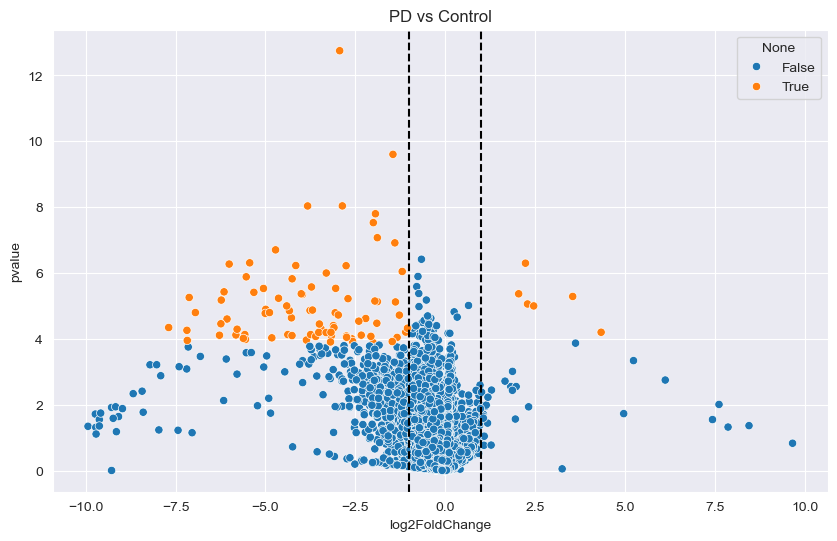

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))
sns.scatterplot(x=deg_results['log2FoldChange'],
                y=-np.log10(deg_results['pvalue']),
                hue=((deg_results['padj'] < 0.05) & (deg_results['abs_log2FoldChange'] > 1)))
plt.axvline(-1, color='k', linestyle='--')
plt.axvline(1, color='k', linestyle='--')
plt.title("PD vs Control")
plt.show()